# VGG16

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-03-01 19:58:58.654911: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

VGG16 is a convolutional neural network that is 16 layers deep. 

You can load a pretrained version of the network trained on more than a million images from the ImageNet database. 

The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

## Important part of VGG16

1. 3x3 Convolutional layer
2. 2x2 Max Pooling layer
3. Fully connected layer
4. Softmax layer

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

2023-03-01 19:59:00.924237: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-01 19:59:00.925032: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-01 19:59:00.935275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 19:59:00.935719: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2023-03-01 19:59:00.935739: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-03-01 19:59:00.937320: I tensorflow/stream_executor/platfor

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

<center>
    <img src = "image/vgg16.jpeg">
</center>

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
vgg16 = model.fit(train_images, train_labels, epochs=10
                    , validation_data=(test_images, test_labels))

2023-03-01 19:59:02.492783: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-01 19:59:02.493260: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3399905000 Hz


Epoch 1/10


2023-03-01 19:59:03.085596: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-03-01 19:59:03.242579: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


1563/1563 [==============================] - 40s 25ms/step - loss: 2.0960 - accuracy: 0.1714 - val_loss: 1.7737 - val_accuracy: 0.3112
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.6898 - accuracy: 0.3406 - val_loss: 1.5210 - val_accuracy: 0.4213
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5146 - accuracy: 0.4257 - val_loss: 1.4444 - val_accuracy: 0.4593
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3849 - accuracy: 0.4841 - val_loss: 1.3218 - val_accuracy: 0.5016
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2844 - accuracy: 0.5244 - val_loss: 1.2244 - val_accuracy: 0.5424
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1975 - accuracy: 0.5573 - val_loss: 1.2274 - val_accuracy: 0.5447
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1270 - accuracy: 0.5862 - val_loss: 1.1237 - val_accura

313/313 - 2s - loss: 1.0323 - accuracy: 0.6258


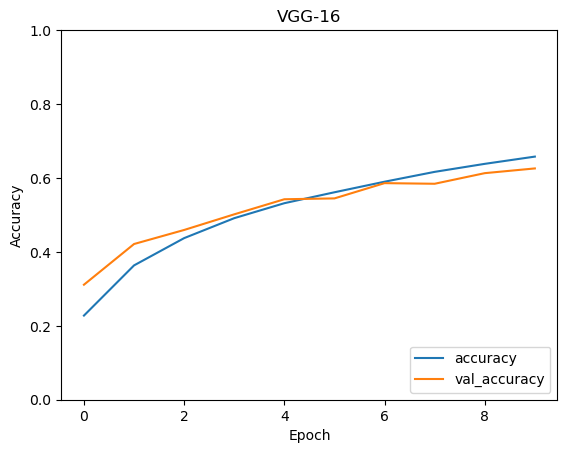

In [6]:
plt.plot(vgg16.history['accuracy'], label='accuracy')
plt.plot(vgg16.history['val_accuracy'], label = 'val_accuracy')
plt.title('VGG-16')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)